<a href="https://colab.research.google.com/github/Enes481/OnlineRetail/blob/master/OnlineRetail_Veri_madencili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_excel('sample_data/online_retail.xlsx', engine='openpyxl')

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.dropna(subset=['Customer ID'], inplace=True)  # Eksik müşteri ID'leri çıkarılır
df = df[df['Quantity'] > 0]  # Negatif miktarlar çıkarılır
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

<ipython-input-5-fb593eb8c92b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
#compute Frequency and Monetary
#Frequency: Number of unique invoices
#Monetary: Total spending

fm = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

fm.columns = ['Kaç Farklı alışveriş (Sıklık)', 'Müşterinin yaptığı toplam harcama']
fm = fm.reset_index()
feature_set = fm[['Kaç Farklı alışveriş (Sıklık)', 'Müşterinin yaptığı toplam harcama']].values

In [ ]:
fm

,Customer ID,Kaç Farklı alışveriş (Sıklık),Müşterinin yaptığı toplam harcama
0,12346.0,11,372.86
1,12347.0,2,1323.32
2,12348.0,1,222.16
3,12349.0,3,2671.14
4,12351.0,1,300.93
...,...,...,...
4309,18283.0,6,641.77
4310,18284.0,1,461.68
4311,18285.0,1,427.00
4312,18286.0,2,1296.43


In [ ]:
#Elbow metodunu kullanıyoruz , optimal kümeleme sayısını bulmak için
# yukarıdaki iki özelliği yani sıklık ve toplan harcamay modelleme/kümeleme işlemlerinde
#kullanılmak üzere bir NumPy array’e çevirir. Bu arrayi elbow metoduna verdik.

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_set)
    wcss.append(kmeans.inertia_)

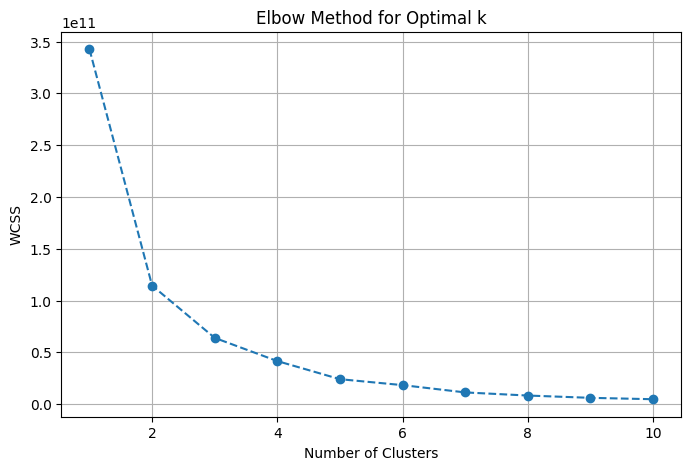

In [ ]:
# Plot the Elbow Method result
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# k değeri 3 seçtik çünkü elbow metodunda 3 den sonra azalmaya başlıyor değer.
k_optimal = 3
km_clustering = KMeans(n_clusters=k_optimal, random_state=42)
cls_model = km_clustering.fit_predict(feature_set)
cls_model

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

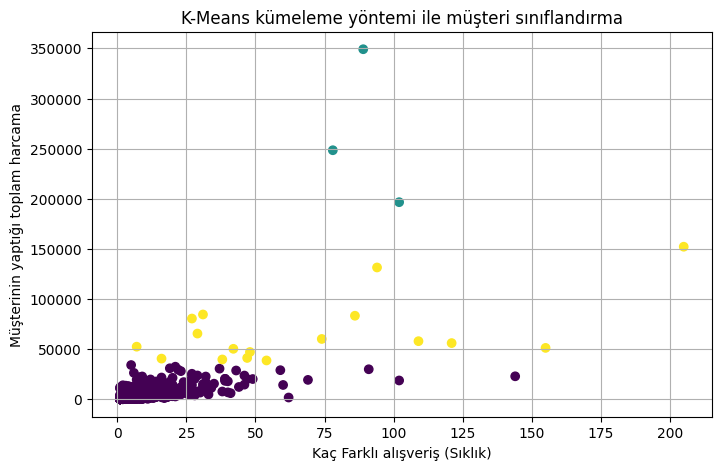

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(fm['Kaç Farklı alışveriş (Sıklık)'], fm['Müşterinin yaptığı toplam harcama'], c=cls_model)
plt.xlabel('Kaç Farklı alışveriş (Sıklık)')
plt.ylabel('Müşterinin yaptığı toplam harcama')
plt.title('K-Means kümeleme yöntemi ile müşteri sınıflandırma')
plt.grid(True)
plt.show()

In [ ]:
#Veri setindeki uniqe müşteri sayısı
unique_customers = df['Customer ID'].nunique()
print("Toplam müşteri sayısı:", unique_customers)
#--------------------------------------------------------------
# Her kümedeki toplam müşteri sayısı
print("Her kümedeki toplam müşteri sayısı:")
print( pd.Series(cls_model).value_counts())

Toplam müşteri sayısı: 4314
Her kümedeki toplam müşteri sayısı:
0    4294
2      17
1       3
Name: count, dtype: int64


In [ ]:
cluster_counts = pd.Series(cls_model).value_counts().sort_index()
cluster_percentages = (cluster_counts / cluster_counts.sum() * 100).round(2)


In [ ]:
summary_df = pd.DataFrame({
    'Müşteri Sayısı': cluster_counts,
    'Yüzdelik Oran (%)': cluster_percentages
})
print(summary_df)

   Müşteri Sayısı  Yüzdelik Oran (%)
0            4294              99.54
1               3               0.07
2              17               0.39


In [ ]:
print("Küme ortlama harcama ve sıklık oranları")
print(fm.groupby(cls_model)[['Kaç Farklı alışveriş (Sıklık)', 'Müşterinin yaptığı toplam harcama']].mean().round(2))

Küme ortlama harcama ve sıklık oranları
   Kaç Farklı alışveriş (Sıklık)  Müşterinin yaptığı toplam harcama
0                           4.14                            1608.14
1                          89.67                          264709.20
2                          69.59                           66619.21


#Apriori ile kümelediğimiz müşterilerin birliktelik kurallarının çıkartılamsı

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# 1. Önce CustomerID ve Cluster eşlemesini yap
customer_clusters = fm[['Customer ID']].copy()
customer_clusters['Cluster'] = cls_model

# 2. Ana veri setine müşteri bazlı küme etiketini ekle
df = df.merge(customer_clusters, on='Customer ID', how='left')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,0
...,...,...,...,...,...,...,...,...,...,...
407690,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,0
407691,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,0
407692,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,0
407693,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,0


In [ ]:
# Her müşterinin aldığı ürünleri listele
basket = df.groupby(['Customer ID', 'Cluster'])['Description'].apply(list).reset_index()

In [ ]:
# Küme 0'ı filtrele
cluster_0 = basket[basket['Cluster'] == 0]

# Ürün listesi
transactions = cluster_0['Description'].tolist()

# Encode işlemi
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4292,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets  = apriori(df_encoded, min_support = 0.05, use_colnames = True, verbose = 1)
frequent_itemsets

Processing 4875 combinations | Sampling itemset size 3


,support,itemsets
0,0.050536,(12 PENCILS SMALL TUBE RED SPOTTY)
1,0.056823,(12 PENCILS SMALL TUBE SKULL)
2,0.064974,(3 HEARTS HANGING DECORATION RUSTIC)
3,0.052632,(3 STRIPEY MICE FELTCRAFT)
4,0.056591,(4 TRADITIONAL SPINNING TOPS)
...,...,...
345,0.057988,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR..."
346,0.052399,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."
347,0.066837,"(ZINC METAL HEART DECORATION, WHITE HANGING HE..."
348,0.061714,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules['itemset_size'] = rules.apply(lambda row: len(set(row['antecedents']) | set(row['consequents'])), axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size
0,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.097345,0.137867,0.062180,0.638756,4.633139,1.0,0.048759,2.386567,0.868730,0.359354,0.580988,0.544885,2
1,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.137867,0.097345,0.062180,0.451014,4.633139,1.0,0.048759,1.644221,0.909562,0.359354,0.391809,0.544885,2
2,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.082906,0.137867,0.057056,0.688202,4.991791,1.0,0.045626,2.765040,0.871962,0.348506,0.638342,0.551027,2
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.137867,0.082906,0.057056,0.413851,4.991791,1.0,0.045626,1.564609,0.927549,0.348506,0.360863,0.551027,2
4,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.119003,0.137867,0.073125,0.614481,4.457066,1.0,0.056719,2.236295,0.880409,0.397972,0.552832,0.572443,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"(HEART OF WICKER SMALL, WHITE HANGING HEART T-...",(HEART OF WICKER LARGE),0.074988,0.130880,0.054029,0.720497,5.505007,1.0,0.044214,3.109517,0.884689,0.355828,0.678407,0.566654,3
146,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",(WHITE HANGING HEART T-LIGHT HOLDER),0.080112,0.262226,0.054029,0.674419,2.571895,1.0,0.033021,2.266019,0.664409,0.187399,0.558697,0.440229,3
147,(WHITE HANGING HEART T-LIGHT HOLDER),"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",0.262226,0.080112,0.054029,0.206039,2.571895,1.0,0.033021,1.158606,0.828413,0.187399,0.136894,0.440229,3
148,(HEART OF WICKER LARGE),"(HEART OF WICKER SMALL, WHITE HANGING HEART T-...",0.130880,0.074988,0.054029,0.412811,5.505007,1.0,0.044214,1.575323,0.941582,0.355828,0.365209,0.566654,3


In [ ]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                            antecedents                       consequents  \
0      (72 SWEETHEART FAIRY CAKE CASES)     (60 TEATIME FAIRY CAKE CASES)   
1         (60 TEATIME FAIRY CAKE CASES)  (72 SWEETHEART FAIRY CAKE CASES)   
2      (PACK OF 60 DINOSAUR CAKE CASES)     (60 TEATIME FAIRY CAKE CASES)   
3         (60 TEATIME FAIRY CAKE CASES)  (PACK OF 60 DINOSAUR CAKE CASES)   
4  (PACK OF 60 PINK PAISLEY CAKE CASES)     (60 TEATIME FAIRY CAKE CASES)   

    support  confidence      lift  
0  0.062180    0.638756  4.633139  
1  0.062180    0.451014  4.633139  
2  0.057056    0.688202  4.991791  
3  0.057056    0.413851  4.991791  
4  0.073125    0.614481  4.457066  


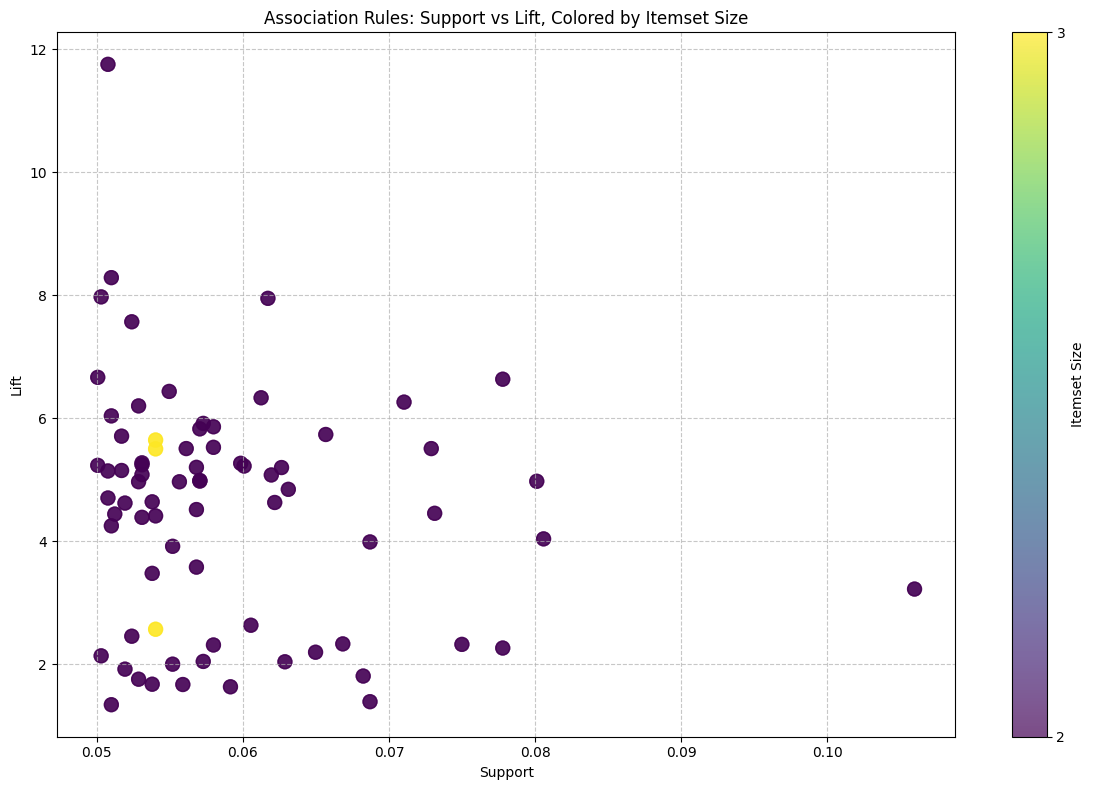

In [ ]:
### Support vs Lift by Itemset Size
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rules['support'],
    rules['lift'],
    c=rules['itemset_size'],  # Color based on itemset size
    cmap='viridis',  # Color map
    alpha=0.7,  # Slight transparency
    s=100  # Marker size
)

# Add colorbar with intervals of 1
cbar = plt.colorbar(scatter, label='Itemset Size')
cbar.set_ticks(list(range(2, rules['itemset_size'].max() + 1)))

# Labels and title
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules: Support vs Lift, Colored by Itemset Size')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#ECLAT Algoritması ile

In [ ]:
!pip install pyECLAT -q
from pyECLAT import ECLAT

In [ ]:
my_eclat = ECLAT(data=df_encoded, verbose=True)


100%|██████████| 2/2 [00:00<00:00, 516.83it/s]


In [ ]:
my_eclat

NameError: name 'my_eclat' is not defined

TypeError: float() argument must be a string or a real number, not 'dict'

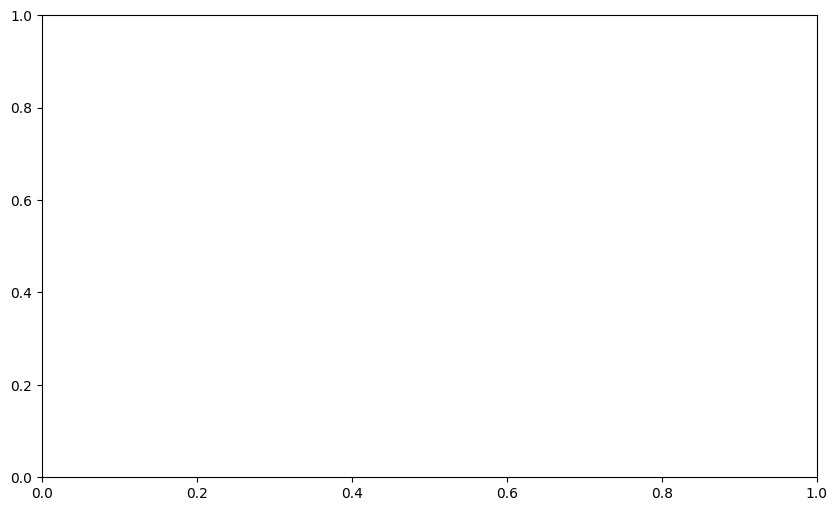

In [ ]:
import matplotlib.pyplot as plt

# itemsetleri string'e dönüştür
itemsets_str = [', '.join(map(str, itemset)) for itemset in itemsets]

plt.figure(figsize=(10, 6))

# Scatter plot çizimi: x=support, y=lift
plt.scatter(supports, lift, color='dodgerblue', alpha=0.7)

# Her noktaya itemset etiketi ekleme (fazla kalabalık olursa kaldırabilirsin)
for i, label in enumerate(itemsets_str):
    plt.annotate(label, (supports[i], lift[i]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift Comparison of Frequent Itemsets')
plt.grid(True)
plt.show()


#FPGrowth

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


# FP-Growth ile sık itemset çıkar
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)

print("\nFP-Growth - İlk 10 sık itemset:")
print(frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10))



FP-Growth - İlk 10 sık itemset:
      support                              itemsets
181  0.262226  (WHITE HANGING HEART T-LIGHT HOLDER)
3    0.187937            (REGENCY CAKESTAND 3 TIER)
135  0.145552       (BAKING SET 9 PIECE RETROSPOT )
122  0.144620    (PACK OF 72 RETRO SPOT CAKE CASES)
20   0.143689       (ASSORTED COLOUR BIRD ORNAMENT)
4    0.137867         (60 TEATIME FAIRY CAKE CASES)
182  0.130880               (HEART OF WICKER LARGE)
21   0.127387      (STRAWBERRY CERAMIC TRINKET BOX)
123  0.125291    (RED HANGING HEART T-LIGHT HOLDER)
183  0.122962               (HEART OF WICKER SMALL)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Generate frequent itemsets using FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

Frequent Itemsets:
      support                                           itemsets
0    0.062413                               (DOORMAT UNION FLAG)
1    0.055659                          (EDWARDIAN PARASOL BLACK)
2    0.055193                        (EDWARDIAN PARASOL NATURAL)
3    0.187937                         (REGENCY CAKESTAND 3 TIER)
4    0.137867                      (60 TEATIME FAIRY CAKE CASES)
..        ...                                                ...
345  0.060550  (CREAM HEART CARD HOLDER, WHITE HANGING HEART ...
346  0.066837  (ZINC METAL HEART DECORATION, WHITE HANGING HE...
347  0.057988  (WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR...
348  0.053796  (REX CASH+CARRY JUMBO SHOPPER, WHITE HANGING H...
349  0.053097              (WICKER STAR , HEART OF WICKER LARGE)

[350 rows x 2 columns]


In [ ]:
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Association Rules:
                            antecedents                           consequents  \
0            (REGENCY CAKESTAND 3 TIER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)            (REGENCY CAKESTAND 3 TIER)   
2         (60 TEATIME FAIRY CAKE CASES)    (PACK OF 72 RETRO SPOT CAKE CASES)   
3    (PACK OF 72 RETRO SPOT CAKE CASES)         (60 TEATIME FAIRY CAKE CASES)   
4  (WHITE HANGING HEART T-LIGHT HOLDER)         (60 TEATIME FAIRY CAKE CASES)   

    support  confidence      lift  
0  0.068701    0.365551  1.394030  
1  0.068701    0.261989  1.394030  
2  0.080578    0.584459  4.041335  
3  0.080578    0.557166  4.041335  
4  0.059152    0.225577  1.636197  


In [ ]:
target_rule = rules[
    (rules['antecedents'] == {'72 SWEETHEART FAIRY CAKE CASES'}) &
    (rules['consequents'] == {'60 TEATIME FAIRY CAKE CASES'})
]
print(target_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                        antecedents                    consequents  support  \
6  (72 SWEETHEART FAIRY CAKE CASES)  (60 TEATIME FAIRY CAKE CASES)  0.06218   

   confidence      lift  
6    0.638756  4.633139  
